In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
import matplotlib_inline 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Formating Plots
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
set_sns_format(width=14, height=8)

In [3]:
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     

    if typ == 'line':
        for line in ax.lines:
            for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                label = "{:.0f}".format(y_value)
                ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)

# Lab | Feature engineering
In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.
Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

* Check for null values in the numerical columns.
* Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
* Use appropriate EDA technique where ever necessary.

In [4]:
df = pd.read_csv(r'C:\Users\ssai\OneDrive\Data_26-07\labs\lab-feature-engineering\files_for_lab/learning_set_modified.csv')

##  Check for null values in the numerical columns.

In [5]:
numerical = df.select_dtypes(include = np.number)

In [6]:
nan_cols = numerical.columns[numerical.isna().any()].tolist()
nan_cols

['AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'MSA',
 'ADI',
 'DMA',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 '

##  Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [7]:
lst1 = ["GEOCODE2", "WEALTH1", "ADI", "DMA", "MSA"]

In [8]:
df.filter(regex=("GEO.*?"))

,GEOCODE
0,
1,2
2,
3,
4,
...,...
95407,
95408,
95409,
95410,4


In [9]:
lst1[0] = "GEOCODE"

In [10]:
df["GEOCODE"].value_counts()

      80168
12     3914
3      3327
14     2017
5      1918
4      1622
2      1408
1      1038
Name: GEOCODE, dtype: int64

In [11]:
df["GEOCODE"][df["GEOCODE"] == " "] = None


In [12]:
df["GEOCODE"].isna().sum()/len(df)

0.8402297404938582

In [13]:
df["WEALTH1"].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [14]:
df["WEALTH1"].isna().sum()/len(df)

0.4688299165723389

In [15]:
df["ADI"].isna().sum()/len(df)

0.001383473776883411

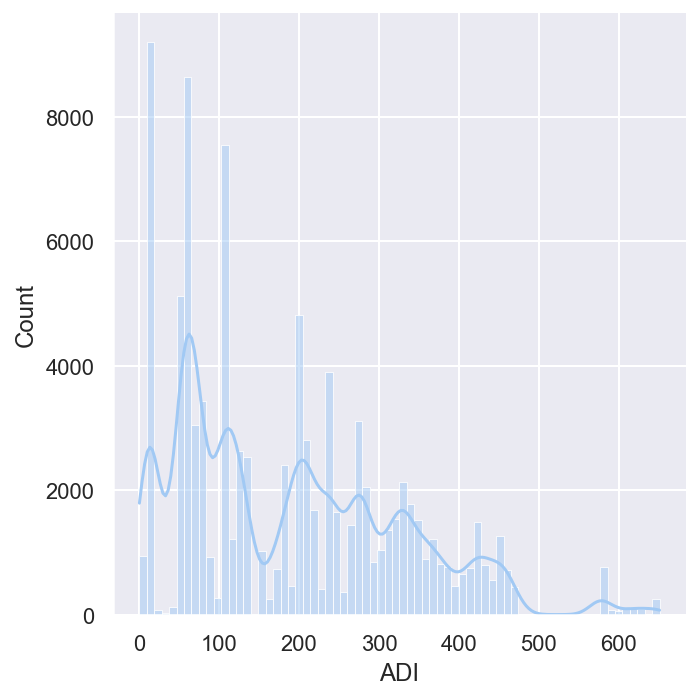

In [16]:
sns.displot(df["ADI"], kde = True)

In [17]:
df["DMA"].isna().sum()/len(df)


0.001383473776883411

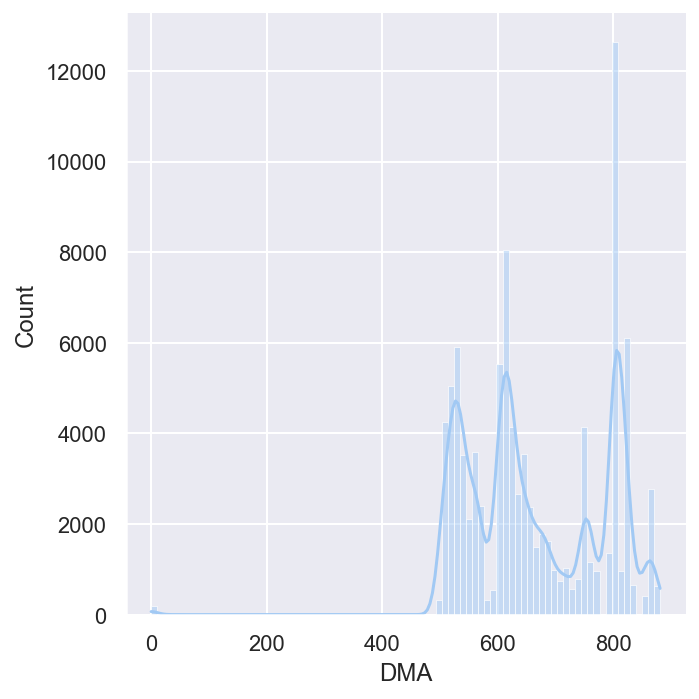

In [18]:
sns.displot(df["DMA"], kde = True)

In [19]:
df["DMA"][df["DMA"]==0] = df["DMA"].mean()

In [20]:
df["MSA"].isna().sum()/len(df)

0.001383473776883411

* GEOCODE has a lot of empty values -> drop column
* WEALTH1 is about half filled with empty values -> best practice for machine learning; create a missing variable indicator
* ADI, DMA and MSA have low amount of empty values -> replace NaNs with average

In [21]:
df.drop(columns = "GEOCODE")

,Unnamed: 0,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,...,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2
0,0,8901,0,IL,,,3712,0,,,...,0,0.0,0,L,4,E,X,X,X,39.0
1,1,9401,1,CA,,,5202,0,,,...,0,0.0,0,L,2,G,X,X,X,1.0
2,2,9001,1,NC,,,0,0,,,...,0,0.0,1,L,4,E,X,X,X,60.0
3,3,8701,0,CA,,,2801,0,,,...,0,0.0,1,L,4,E,X,X,X,41.0
4,4,8601,0,FL,,,2001,0,X,X,...,0,0.0,1,L,2,F,X,X,X,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,9601,1,AK,,,0,0,,,...,0,0.0,0,L,1,G,X,X,X,12.0
95408,95408,9601,1,TX,,,5001,0,,,...,0,0.0,1,L,1,F,X,X,X,2.0
95409,95409,9501,1,MI,,,3801,0,,X,...,0,0.0,1,L,3,E,X,X,X,34.0
95410,95410,8601,0,CA,,,4005,0,X,,...,1,18.0,1,L,4,F,X,X,X,11.0


In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy="median", add_indicator = True)
 
x = imputer.fit_transform(df[["WEALTH1"]])
df["WEALTH1"] = x[:,0]
df["WEALTH1_missing"] = x[:,1]

In [23]:
df["WEALTH1"].value_counts()

6.0    50557
9.0     7585
8.0     6793
7.0     6198
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

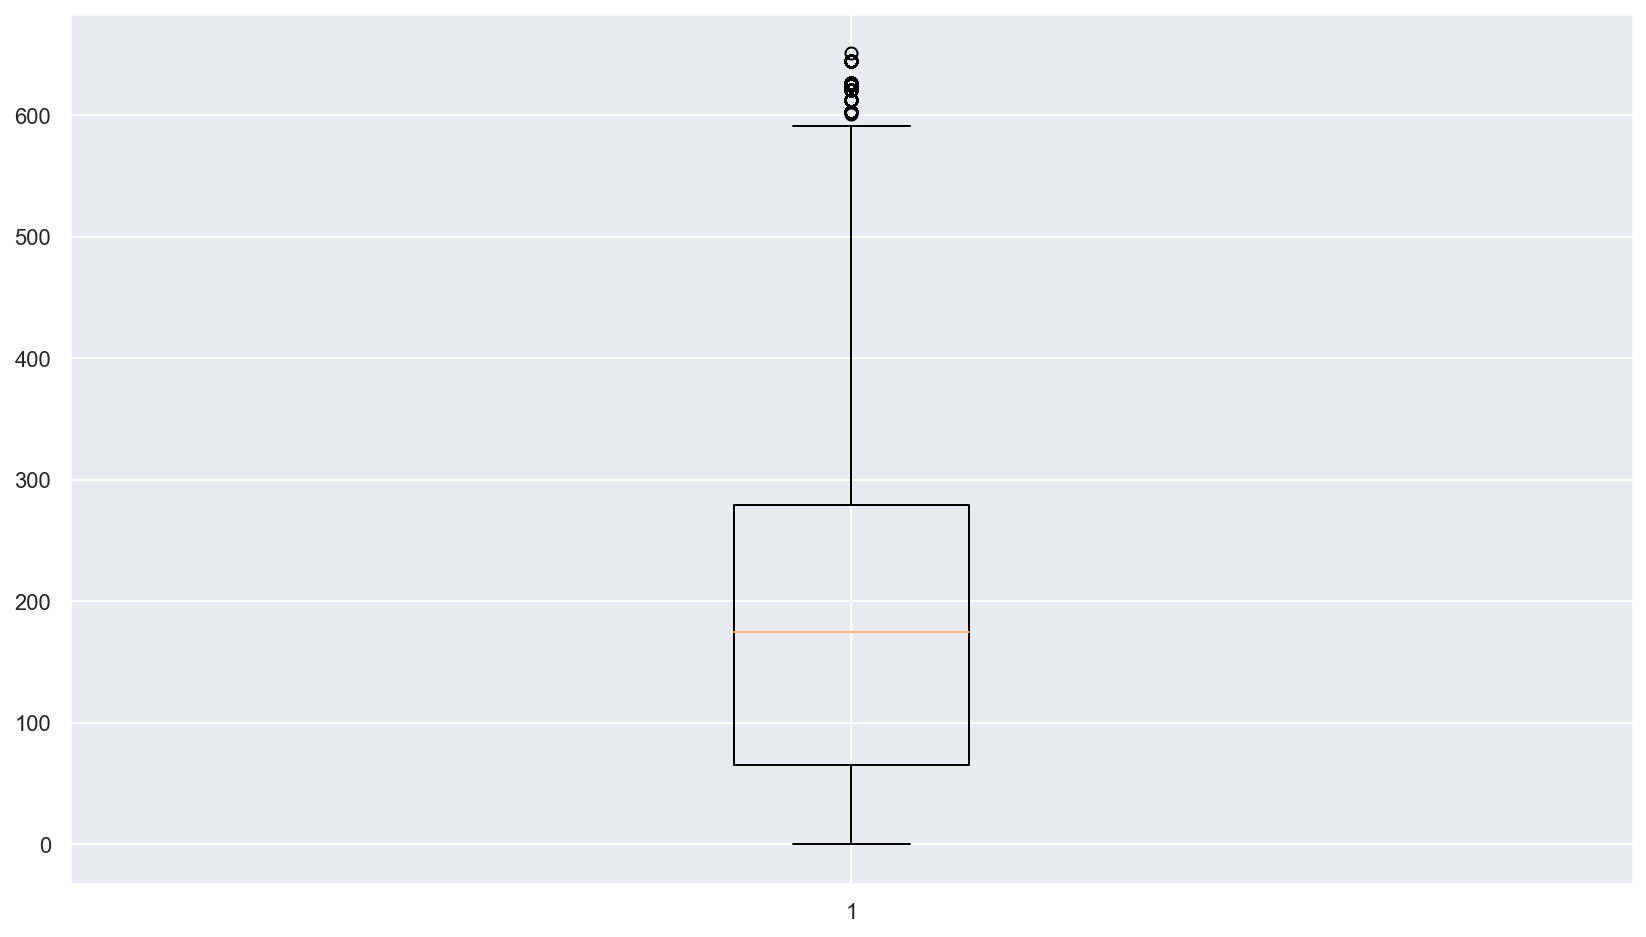

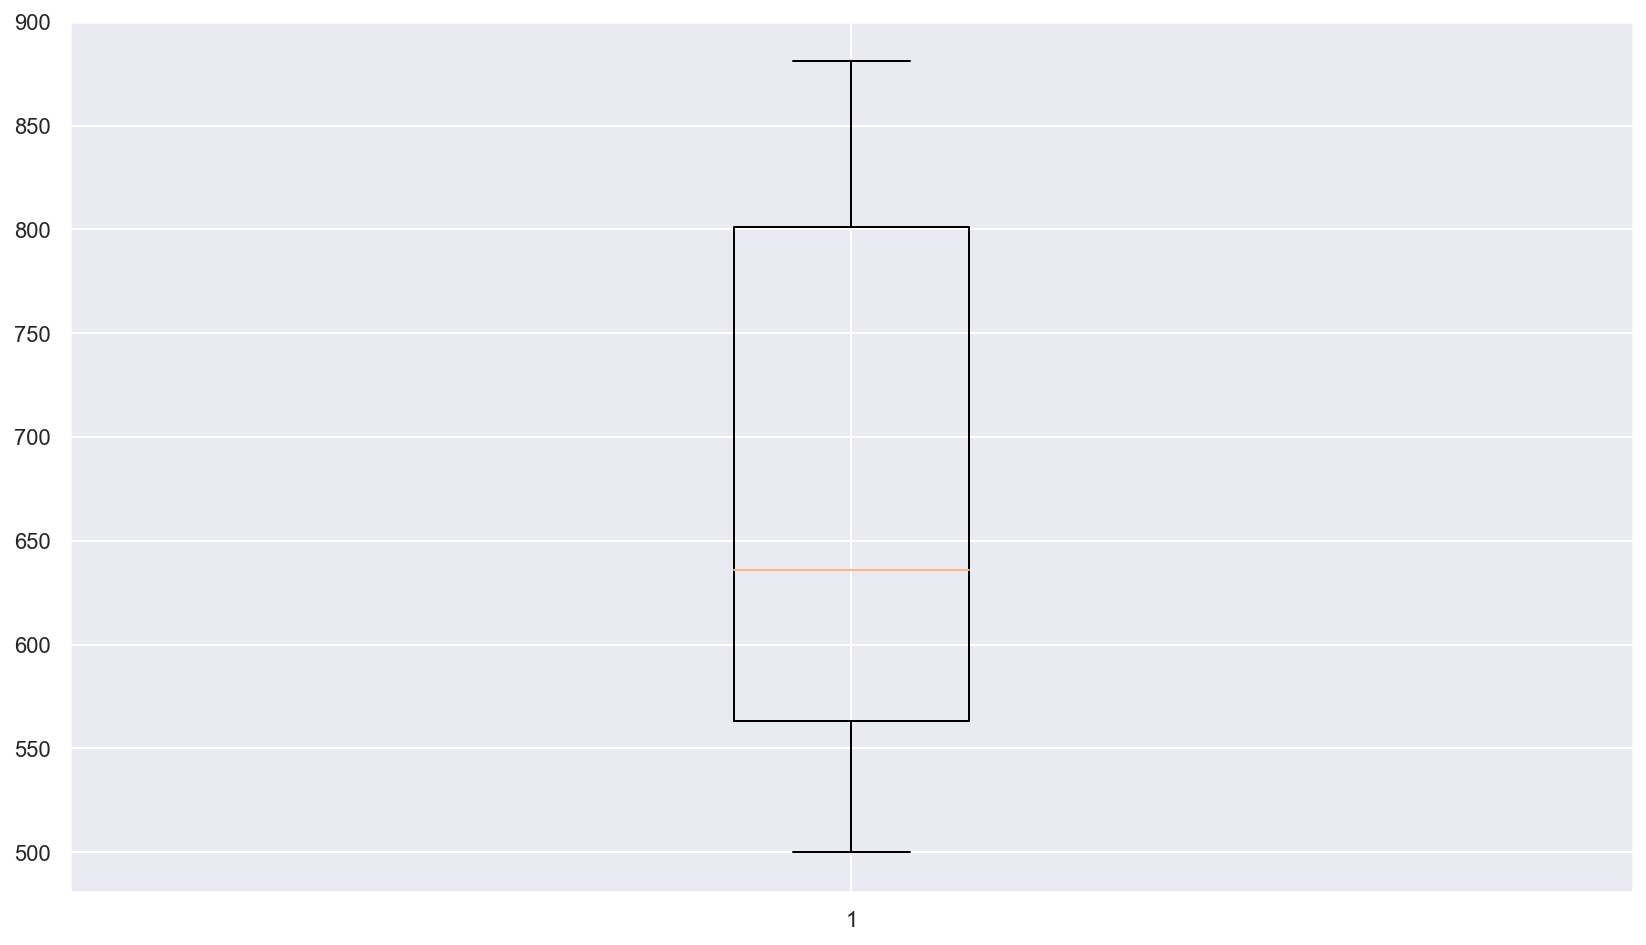

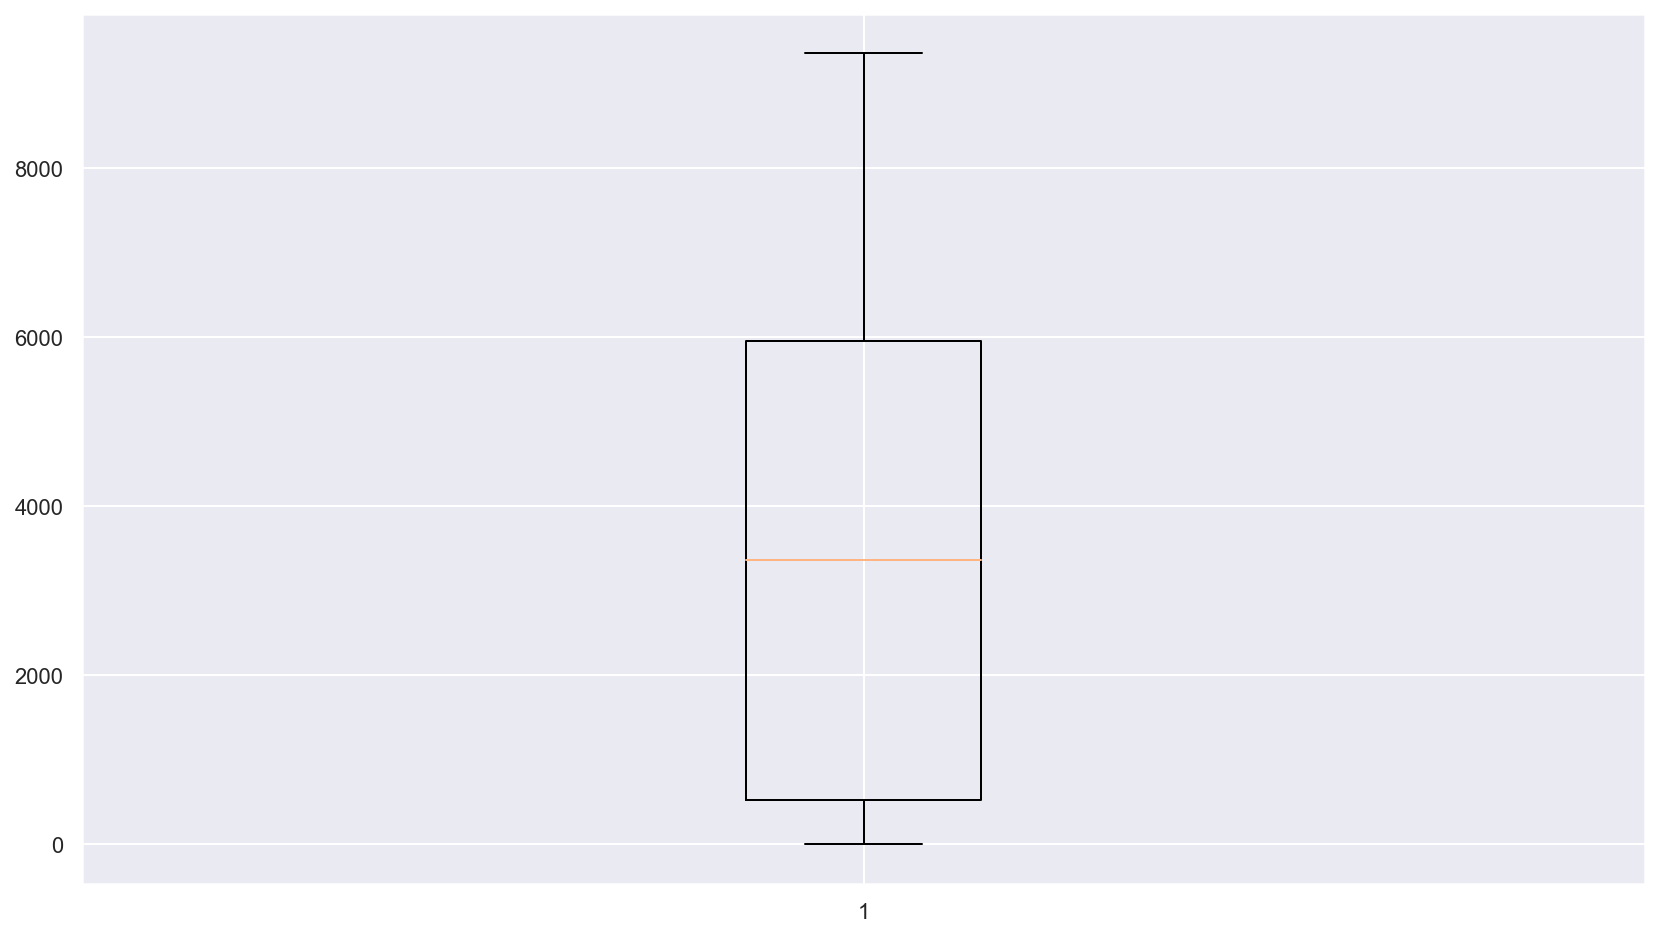

In [24]:
for item in ["ADI", "DMA", "MSA"]:
    df[item].fillna((df[item].mean()), inplace=True)
    plt.boxplot(df[item])
    plt.show()

In [27]:
def drop_outliers_IQR(df,col):

    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3-q1

    not_outliers = df.loc[~((col<(q1-1.5*IQR)) | (col>(q3+1.5*IQR)))]
    
    return not_outliers.reset_index()

In [28]:

df = drop_outliers_IQR(df,df["ADI"])
df

,index,Unnamed: 0,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,WEALTH1_missing
0,0,0,8901,0,IL,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,1.0
1,1,1,9401,1,CA,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,0.0
2,2,2,9001,1,NC,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,0.0
3,3,3,8701,0,CA,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,0.0
4,4,4,8601,0,FL,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94799,95407,95407,9601,1,AK,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,1.0
94800,95408,95408,9601,1,TX,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,0.0
94801,95409,95409,9501,1,MI,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,1.0
94802,95410,95410,8601,0,CA,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,1.0
